# 



Análise de Viagens - Portal da Transparência

- Qual a distribuição de gastos por órgão?
- Existem padrões sazonais nas viagens?
- Quais destinos são mais custosos?
- Há correlação entre urgência e valores?
- Qual o perfil típico de viajante por instituição?

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurações
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# versoes
print(f'Python Utilizado: {sys.version}')
print(f'Pandas: {pd.__version__}')

Python Utilizado: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Pandas: 2.2.3


## Coletando Dados

In [2]:
try:
    df = pd.read_csv('2024_Viagem.csv', encoding='iso-8859-1', sep=';', decimal=",")
    print('\n=== Dados Carregados com Sucesso ===\n')
except Exception as e:
    print(f'Erro ao carregar dados:\n{e}')


=== Dados Carregados com Sucesso ===



## Explorando Dados

In [3]:
# visualizando dados
df

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,23/02/2024,25/02/2024,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,18/01/2024,22/01/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,29/02/2024,04/03/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,11/04/2024,15/04/2024,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,29/01/2024,06/02/2024,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791515,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,16/12/2024,16/12/2024,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00
791516,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,17/12/2024,18/12/2024,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00
791517,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,26/12/2024,27/12/2024,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00
791518,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,29/12/2024,31/12/2024,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00


In [12]:
# dimensões
df.shape

(791520, 22)

In [16]:
# tipos de dados
df.dtypes

Identificador do processo de viagem      int64
Número da Proposta (PCDP)               object
Situação                                object
Viagem Urgente                          object
Justificativa Urgência Viagem           object
Código do órgão superior                 int64
Nome do órgão superior                  object
Código órgão solicitante                 int64
Nome órgão solicitante                  object
CPF viajante                            object
Nome                                    object
Cargo                                   object
Função                                  object
Descrição Função                        object
Período - Data de início                object
Período - Data de fim                   object
Destinos                                object
Motivo                                  object
Valor diárias                          float64
Valor passagens                        float64
Valor devolução                        float64
Valor outros 

In [13]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791520 entries, 0 to 791519
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Identificador do processo de viagem  791520 non-null  int64  
 1   Número da Proposta (PCDP)            791520 non-null  object 
 2   Situação                             791520 non-null  object 
 3   Viagem Urgente                       791520 non-null  object 
 4   Justificativa Urgência Viagem        791297 non-null  object 
 5   Código do órgão superior             791520 non-null  int64  
 6   Nome do órgão superior               791520 non-null  object 
 7   Código órgão solicitante             791520 non-null  int64  
 8   Nome órgão solicitante               791520 non-null  object 
 9   CPF viajante                         660320 non-null  object 
 10  Nome                                 791520 non-null  object 
 11  Cargo        

In [14]:
# dados faltantes
    

Identificador do processo de viagem         0
Número da Proposta (PCDP)                   0
Situação                                    0
Viagem Urgente                              0
Justificativa Urgência Viagem             223
Código do órgão superior                    0
Nome do órgão superior                      0
Código órgão solicitante                    0
Nome órgão solicitante                      0
CPF viajante                           131200
Nome                                        0
Cargo                                  306532
Função                                      0
Descrição Função                            3
Período - Data de início                    0
Período - Data de fim                       0
Destinos                                    0
Motivo                                      1
Valor diárias                               0
Valor passagens                             0
Valor devolução                             0
Valor outros gastos               

In [20]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("\n=== Dados faltantes por coluna:===\n")
for col, count, pct in zip(missing_data.index, missing_data.values, missing_percentage.values):
    if count > 0:
        print(f"{col}: {count:,} ({pct:.2f}%)")


=== Dados faltantes por coluna:===

Justificativa Urgência Viagem: 223 (0.03%)
CPF viajante: 131,200 (16.58%)
Cargo: 306,532 (38.73%)
Descrição Função: 3 (0.00%)
Motivo: 1 (0.00%)


In [21]:
# estatisticas
df.describe()

,Identificador do processo de viagem,Código do órgão superior,Código órgão solicitante,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
count,791520.00,791520.00,791520.00,791520.00,791520.00,791520.00,791520.00
mean,22584709.26,30125.56,27634.32,1970.80,1049.07,21.38,17.96
std,69668681.28,18484.33,16786.39,5775.13,2606.43,278.20,174.43
min,18831091.00,-1.00,-1.00,0.00,0.00,0.00,0.00
25%,19904902.50,24000.00,22000.00,386.47,0.00,0.00,0.00
50%,20156378.50,30000.00,26419.00,990.70,0.00,0.00,0.00
75%,20415938.25,47000.00,37202.00,1780.25,1472.64,0.00,0.00
max,2024001948.00,84000.00,63000.00,153371.34,290096.16,75650.00,73347.00


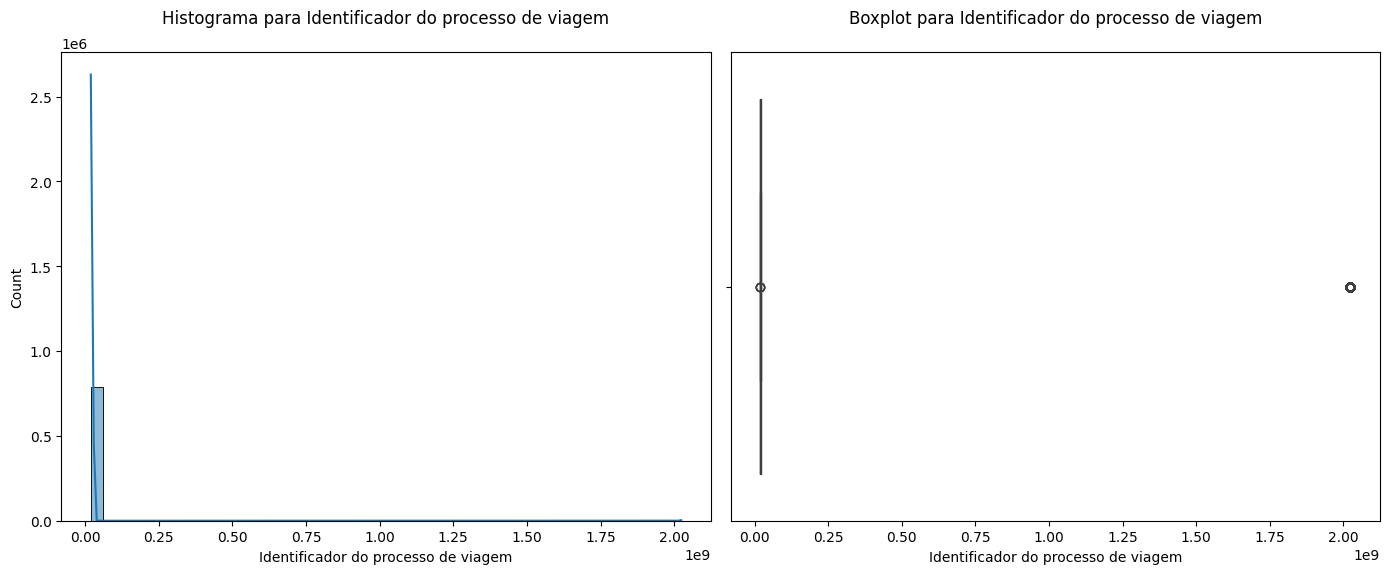

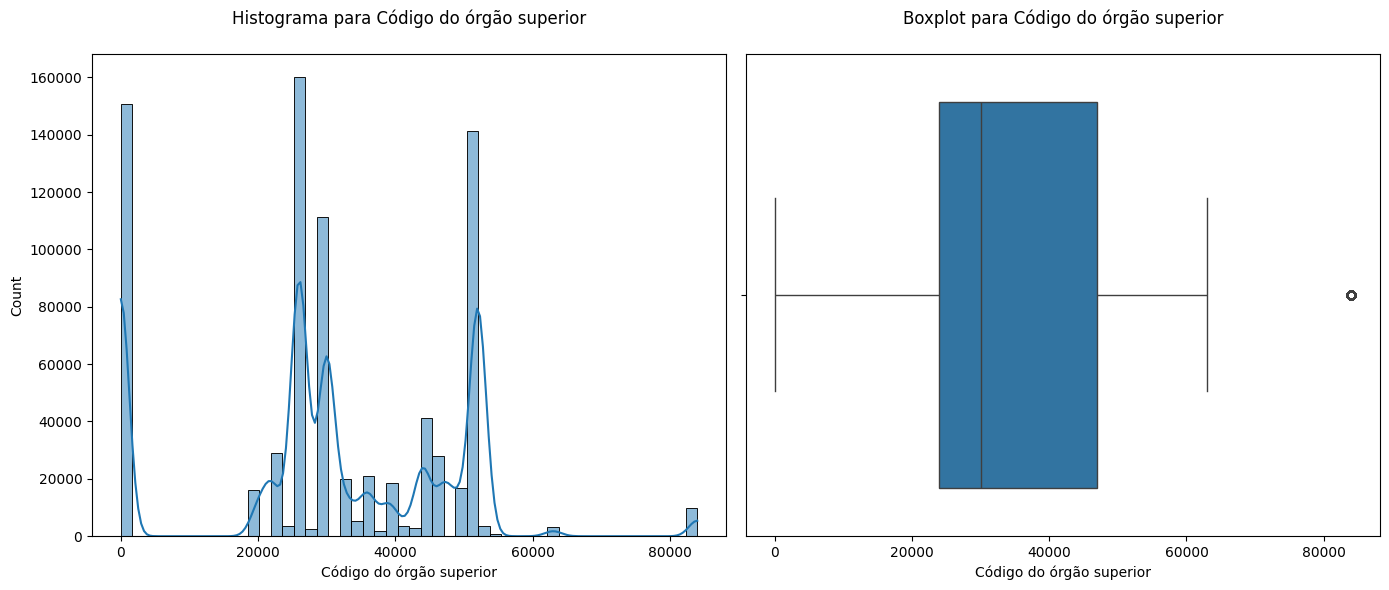

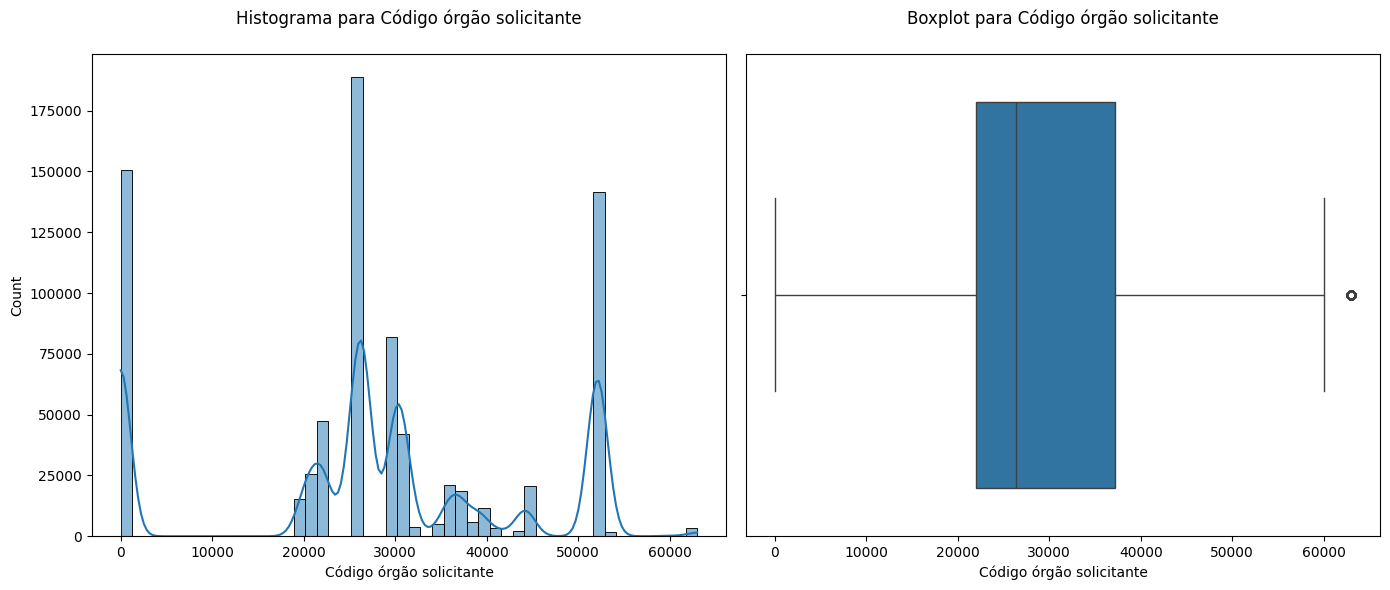

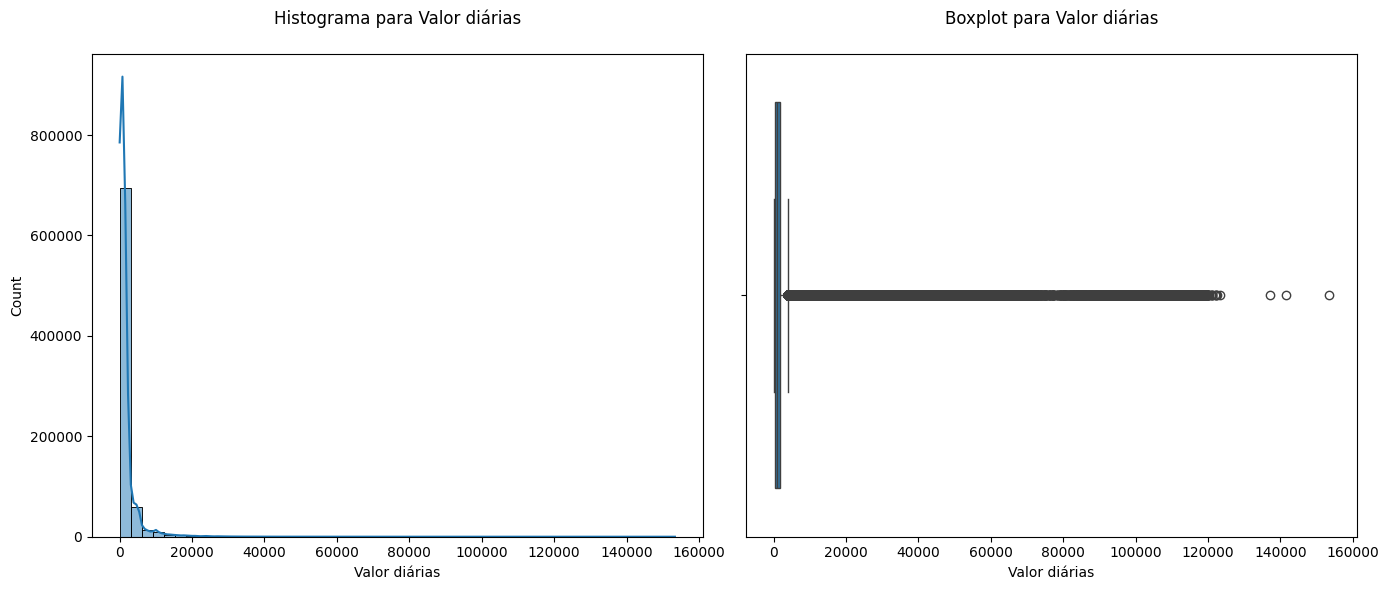

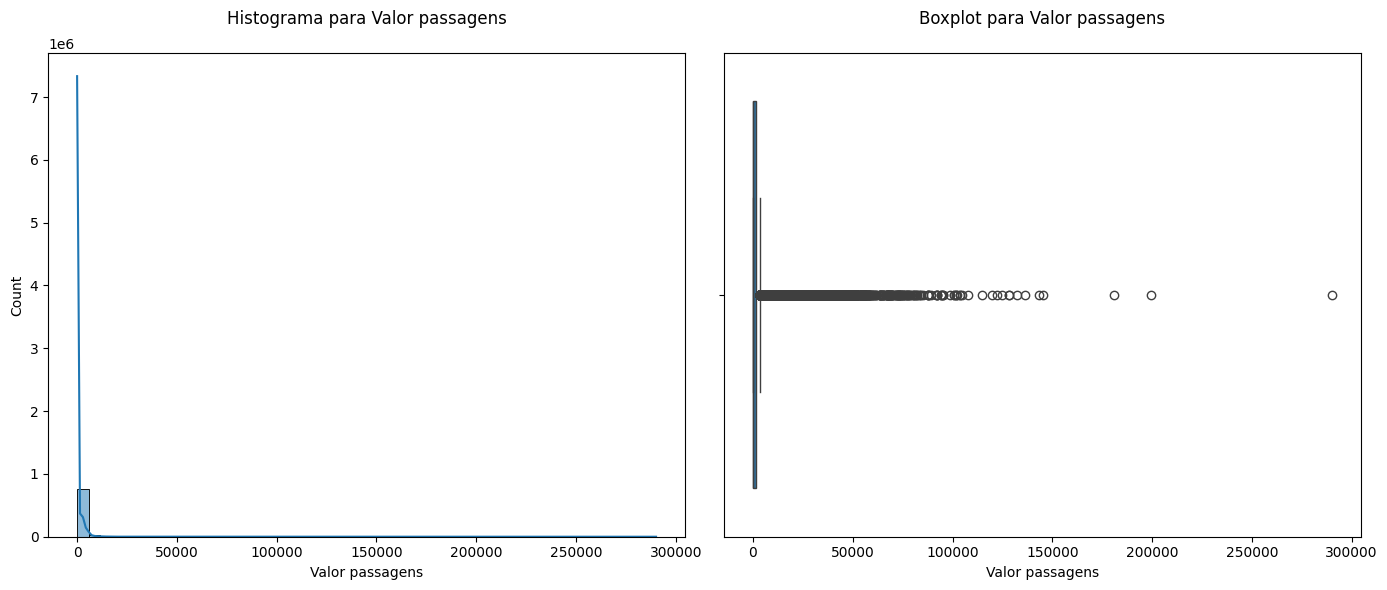

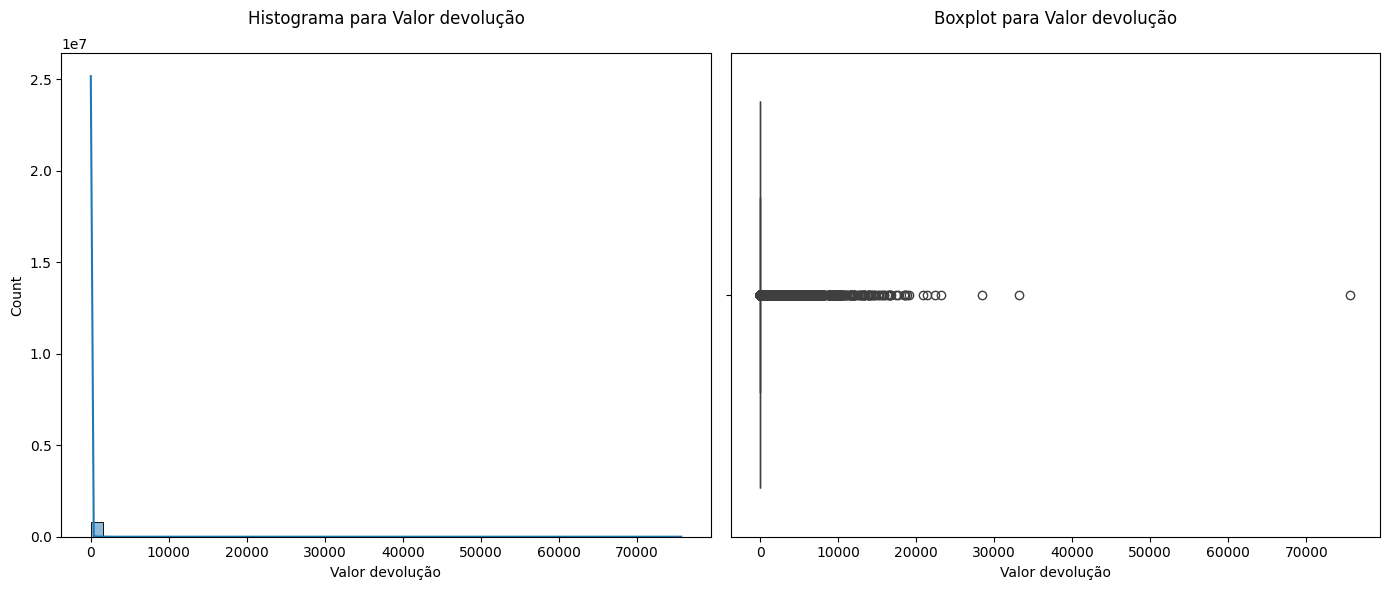

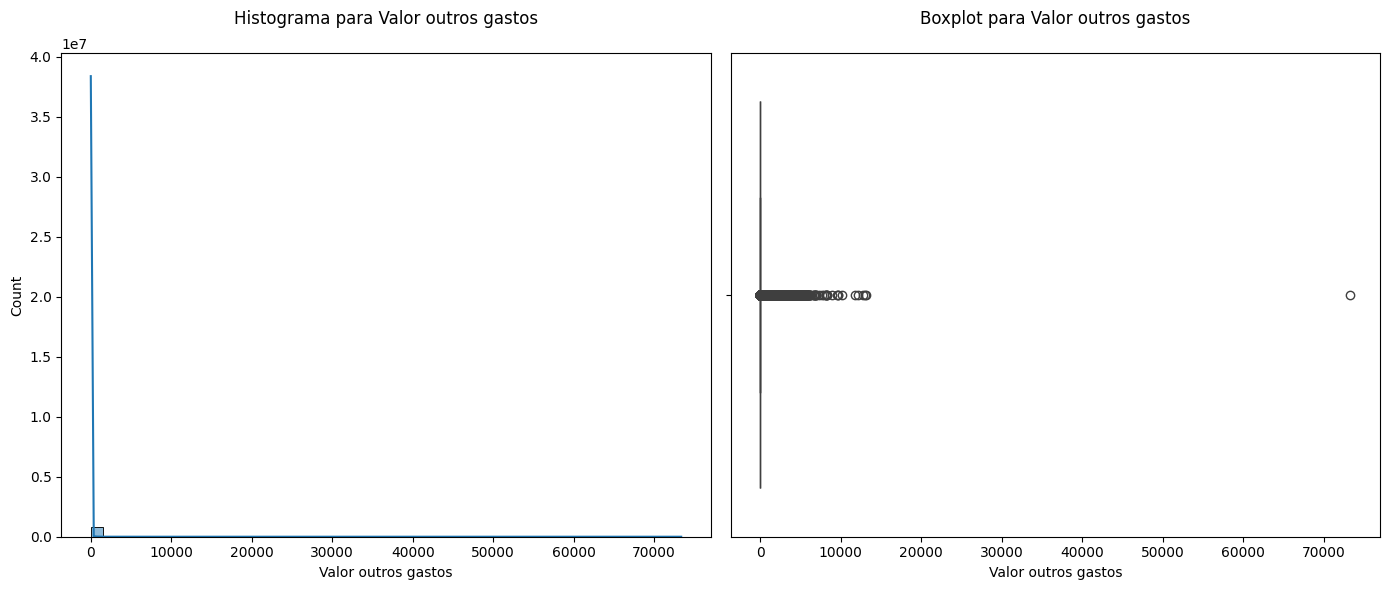

In [31]:
# distribuição dos dados
for col in df.select_dtypes(['float64', 'int64']):
    fig, axes = plt.subplots(1,2, figsize=(14,6))
    
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma para {col}\n')

    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot para {col}\n')

    plt.tight_layout()

    plt.show()

In [26]:
df.select_dtypes('object').mode().T

,0
Número da Proposta (PCDP),Informações p
Situação,Realizada
Viagem Urgente,SIM
Justificativa Urgência Viagem,Sem informação
Nome do órgão superior,Ministério da Educação
Nome órgão solicitante,Sem informação
CPF viajante,***.000.000-**
Nome,Informações protegidas por sigilo
Cargo,Informações protegidas por sigilo
Função,-1


In [41]:
# contagem de valores categoricos
print("=== CONTAGEM DE VALORES ÚNICOS POR CATEGORIA ===")
for col in df.select_dtypes('object'):
    print(f'\n{df[col].value_counts()}')
    print('='*100)

=== CONTAGEM DE VALORES ÚNICOS POR CATEGORIA ===

Número da Proposta (PCDP)
Informações p    118291
Sem informaçã       958
000048/24           184
000043/24           184
000066/24           182
                  ...  
072784/24             1
072798/24             1
032926/24-2C          1
071860/24             1
073575/24             1
Name: count, Length: 107225, dtype: int64

Situação
Realizada        780827
Não realizada     10693
Name: count, dtype: int64

Viagem Urgente
SIM    462015
NÃO    329505
Name: count, dtype: int64

Justificativa Urgência Viagem
Sem informação                                                                                211501
Informação protegida por sigilo nos termos da legislação vigente                              118291
Conforme Diárias e Passagens e autorizações em anexo.                                          25445
Conforme Diária e Passagens e autorizações em anexo.                                           13947
Necessidade de atender o praz

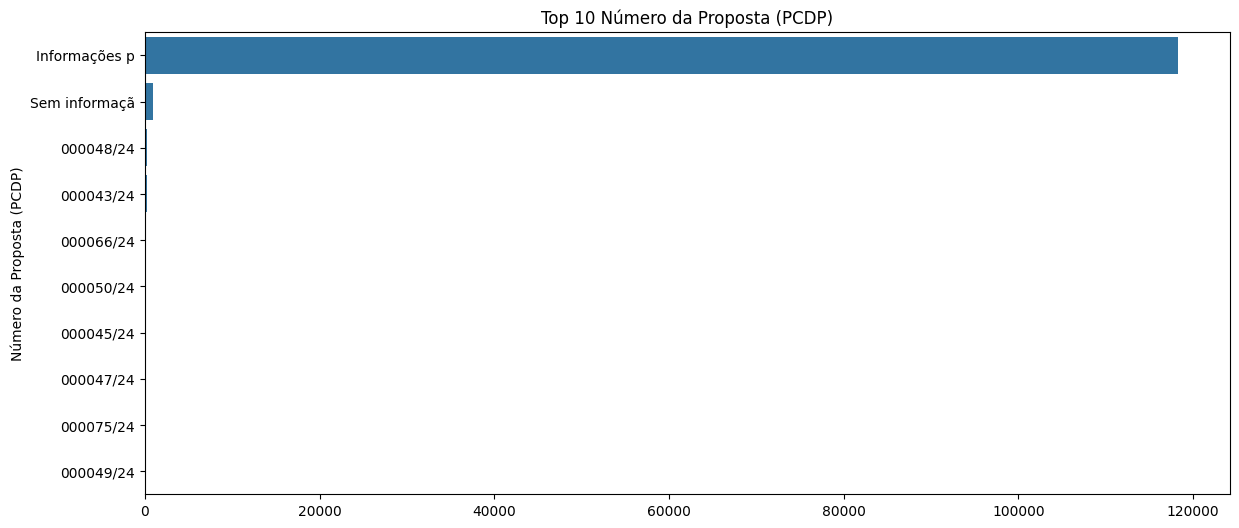

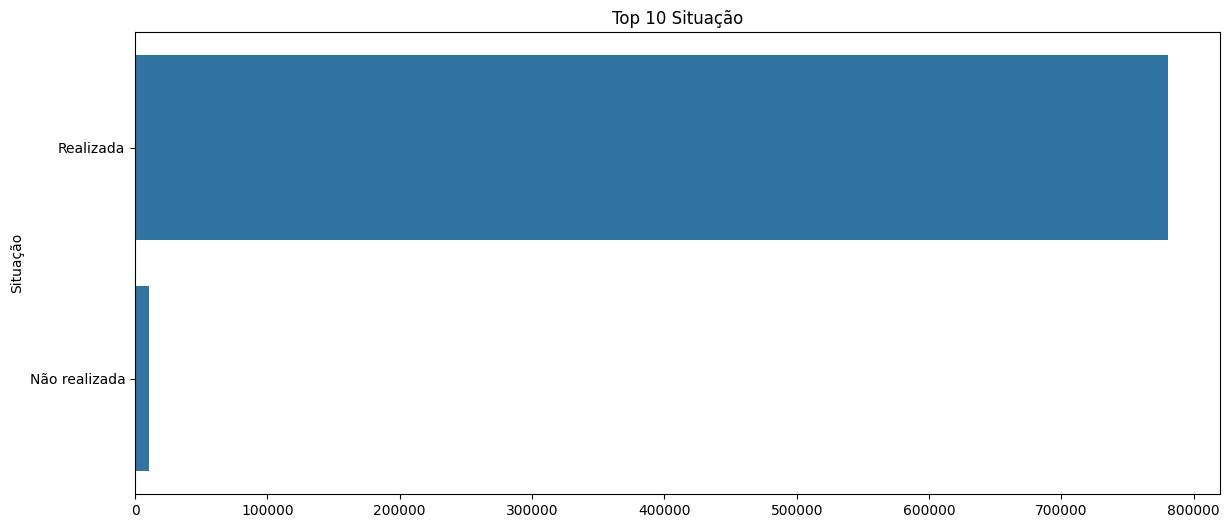

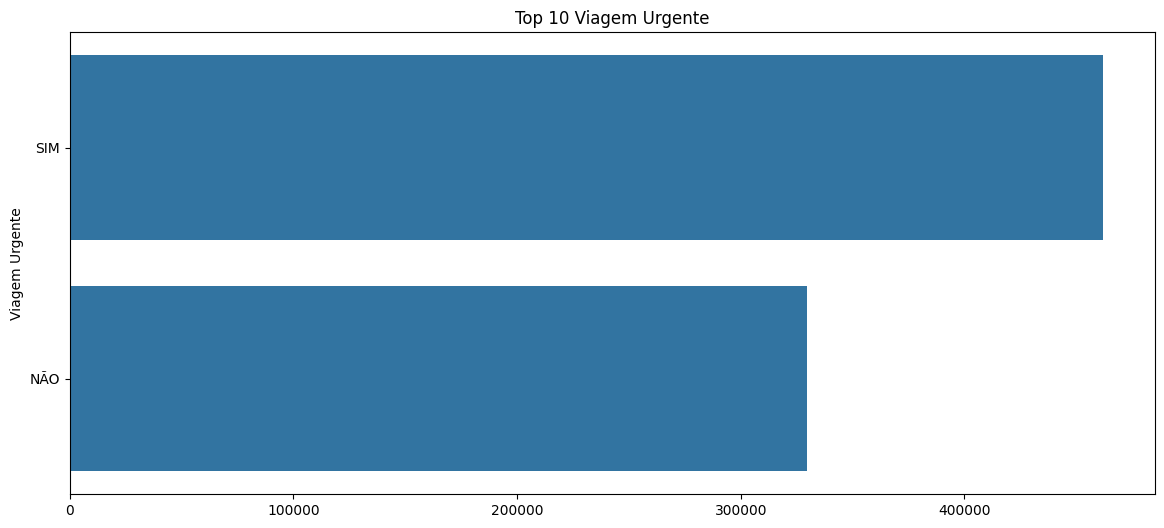

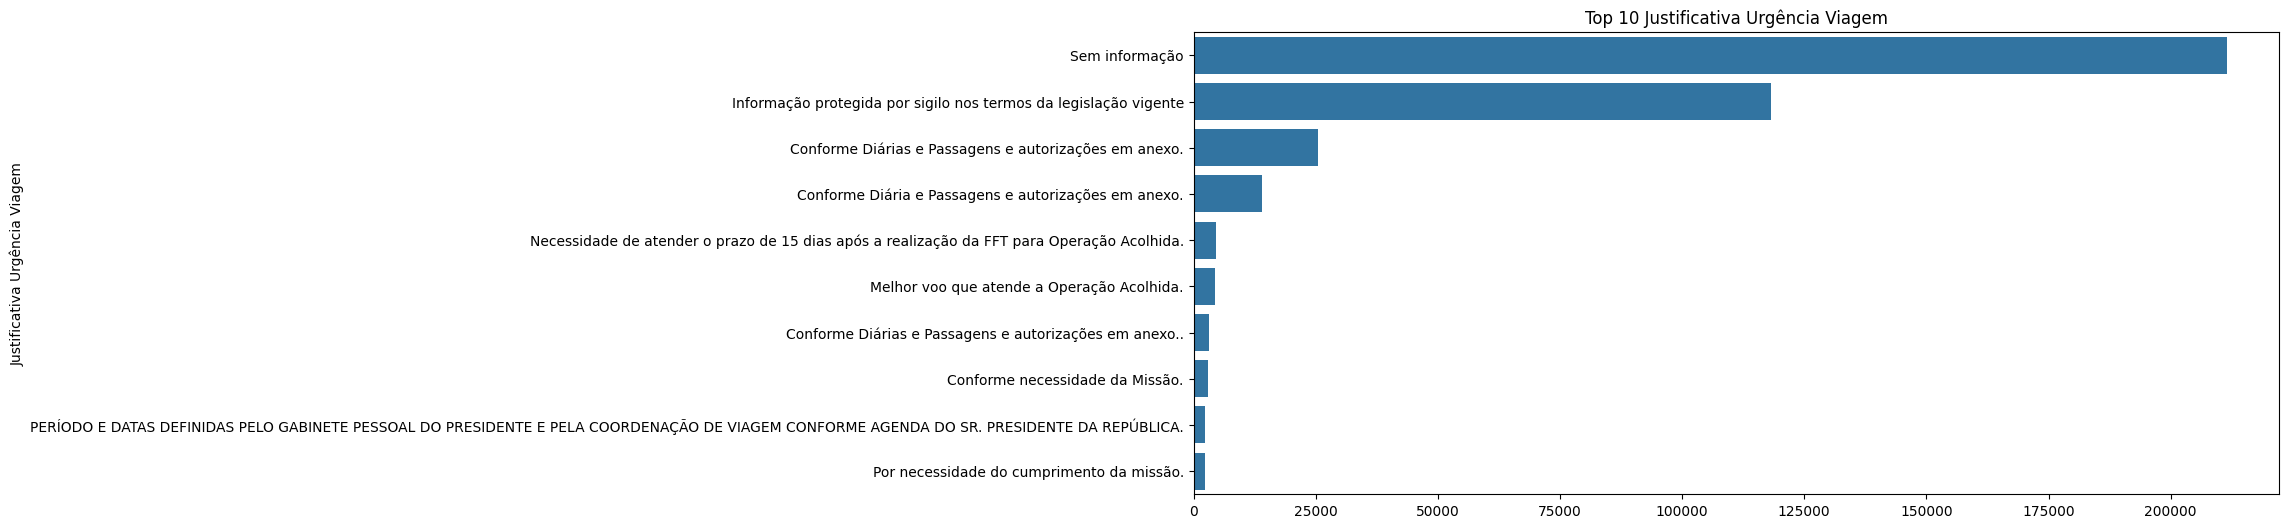

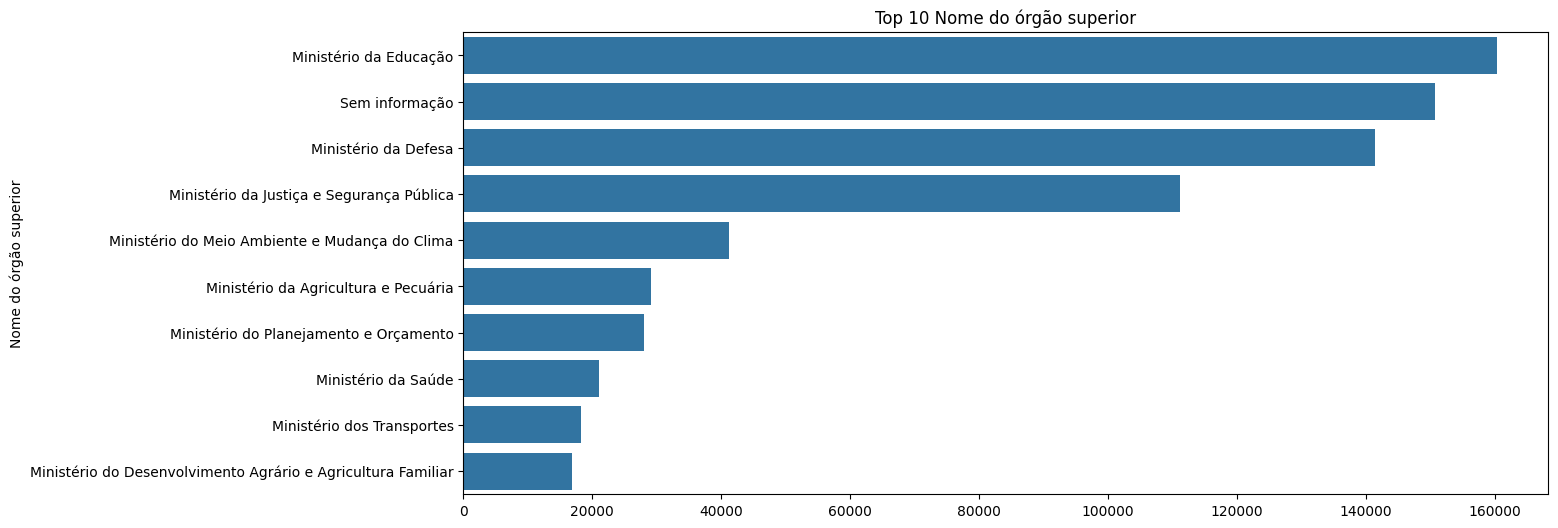

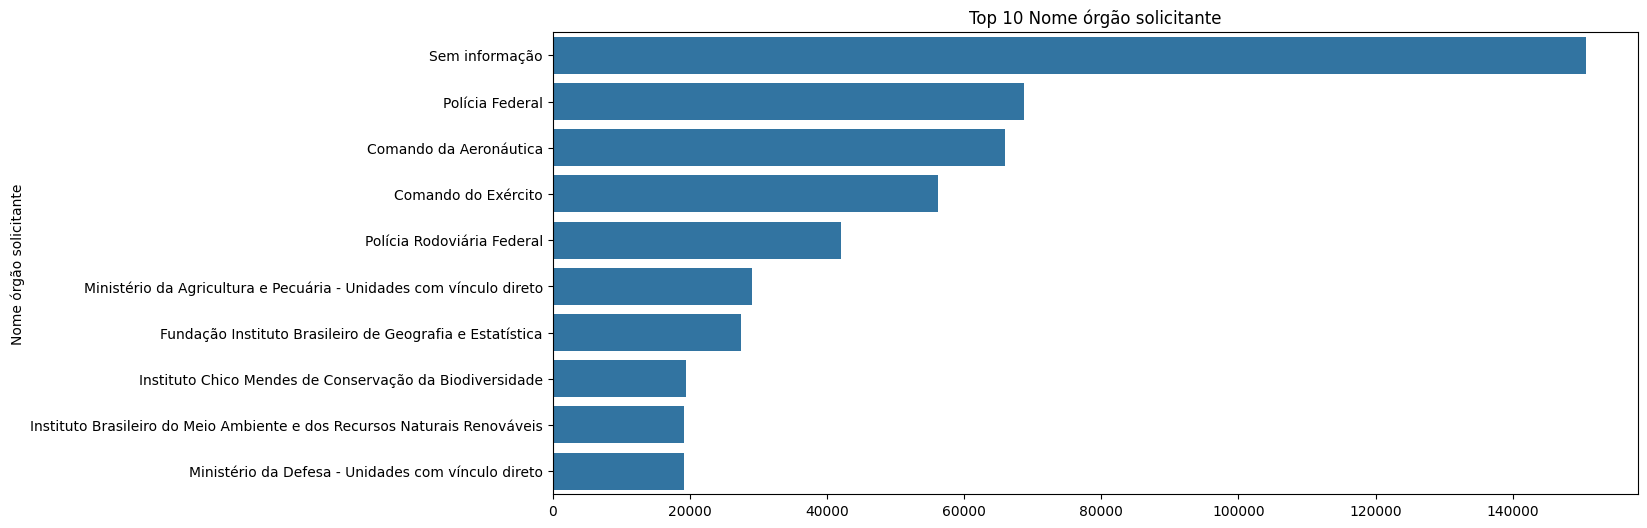

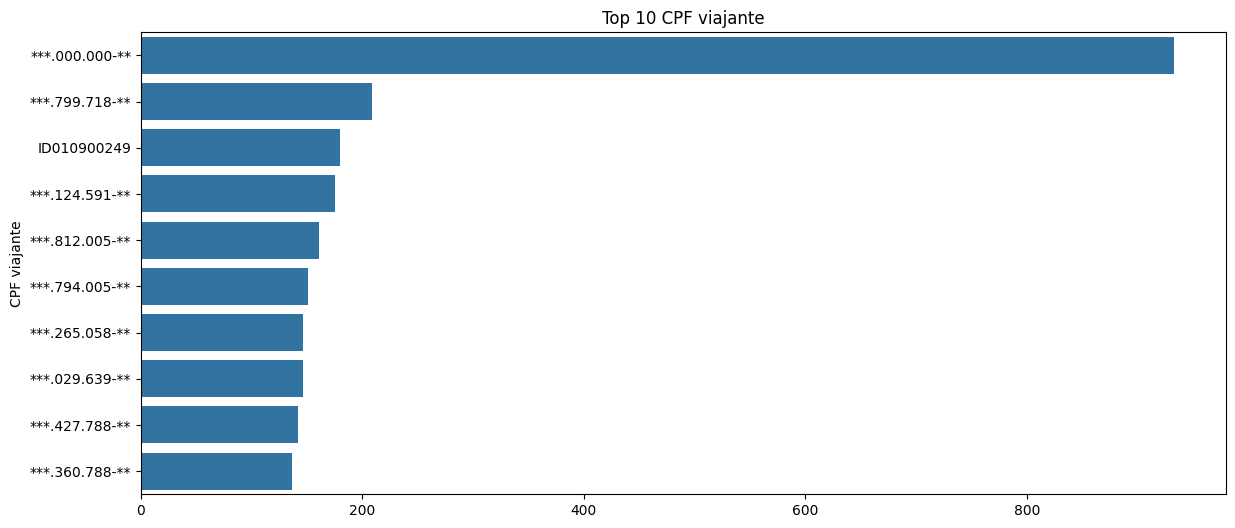

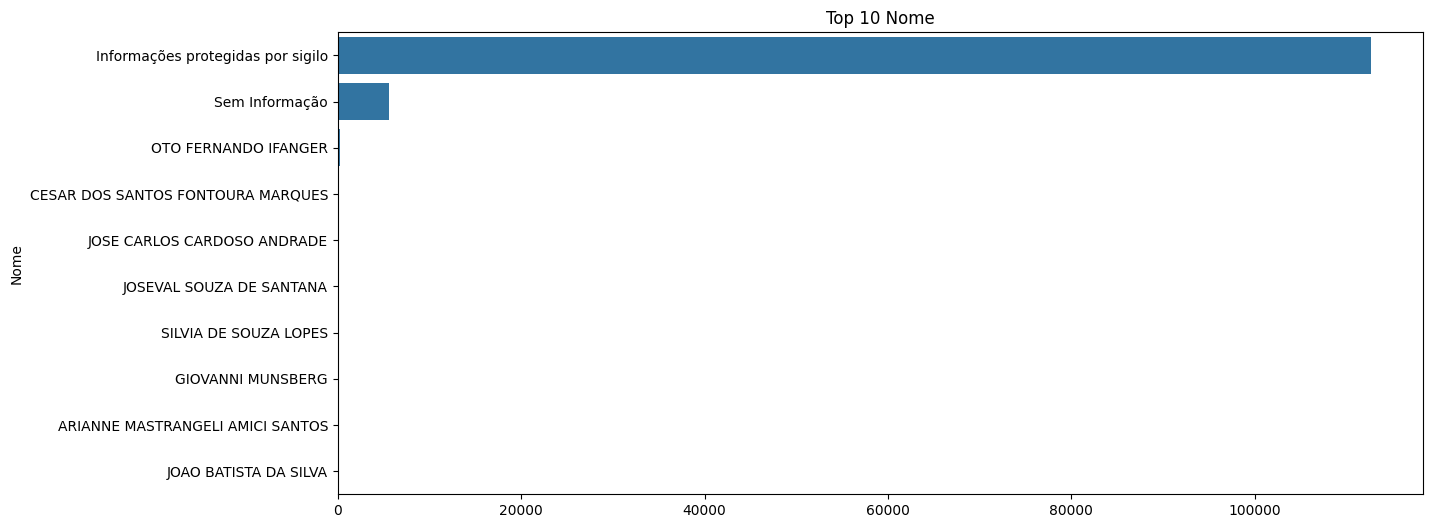

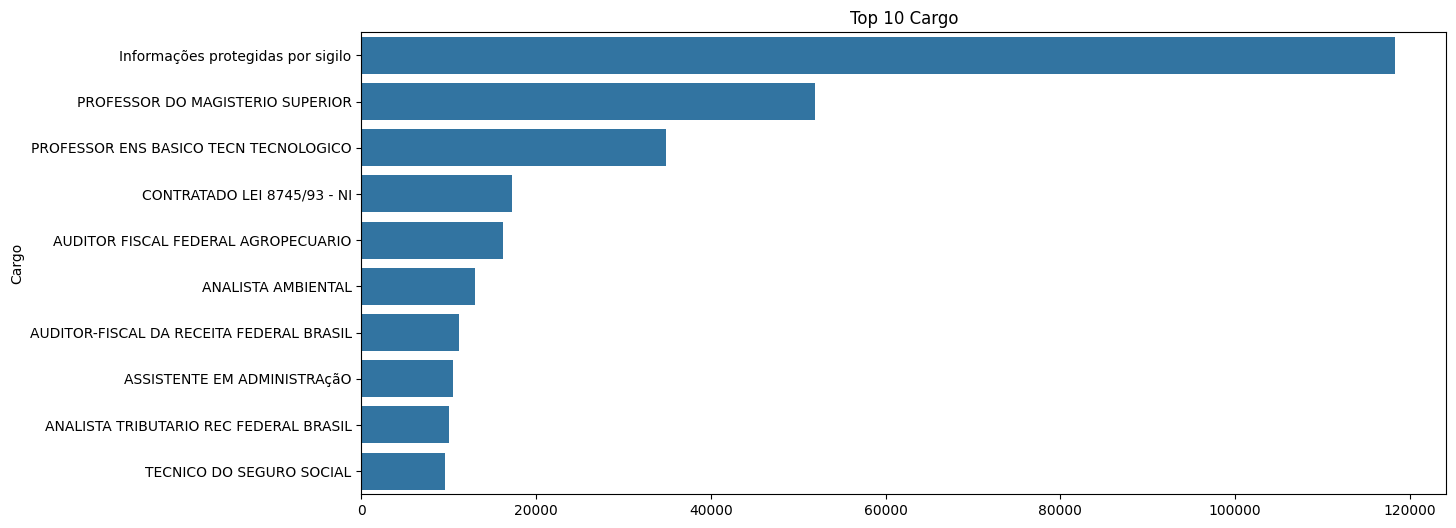

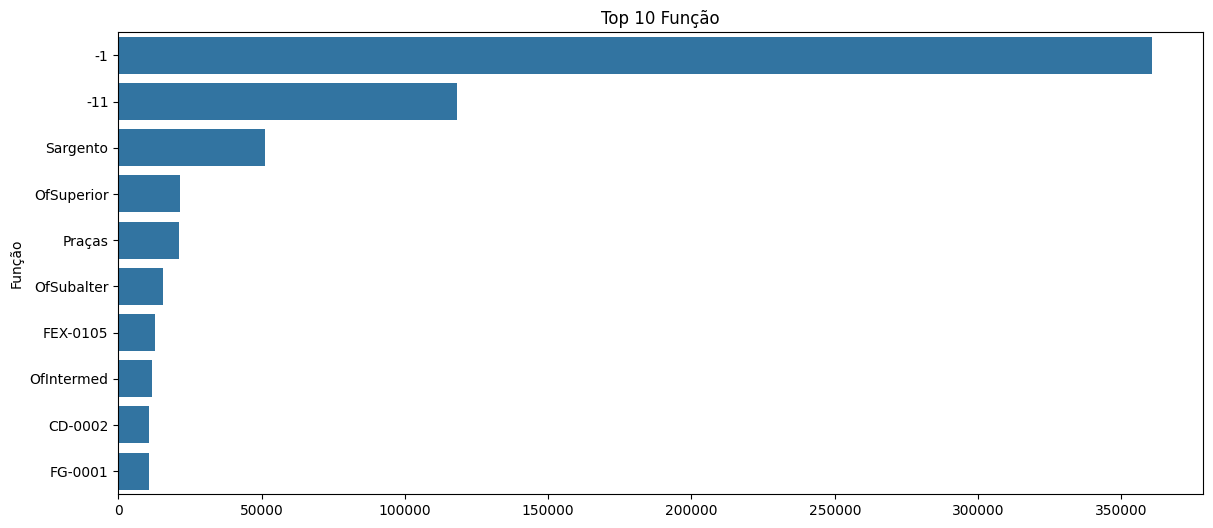

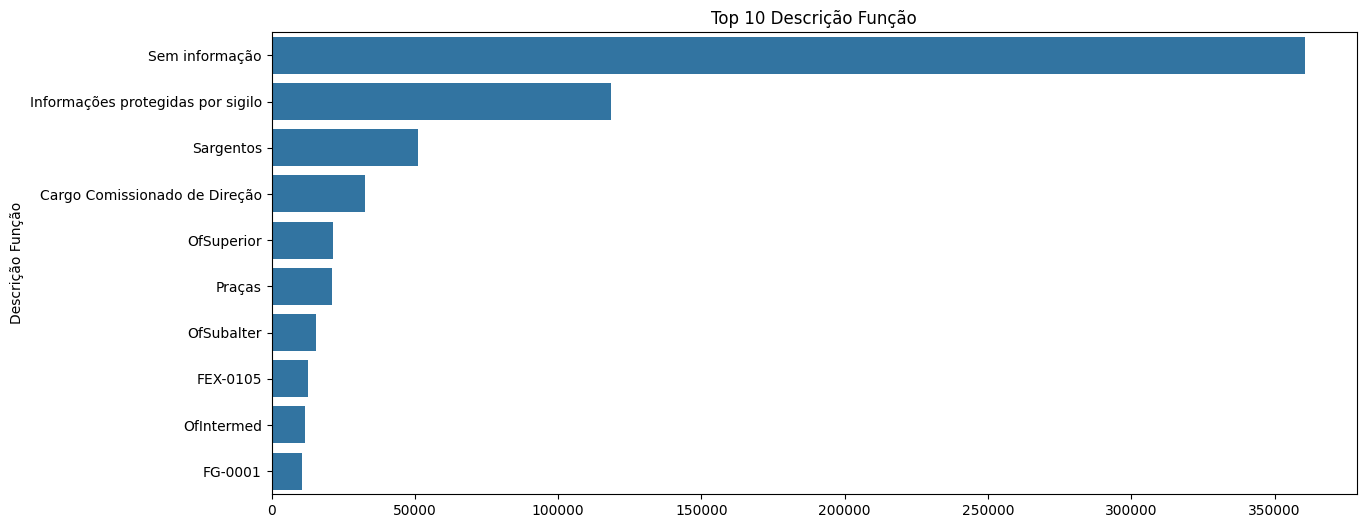

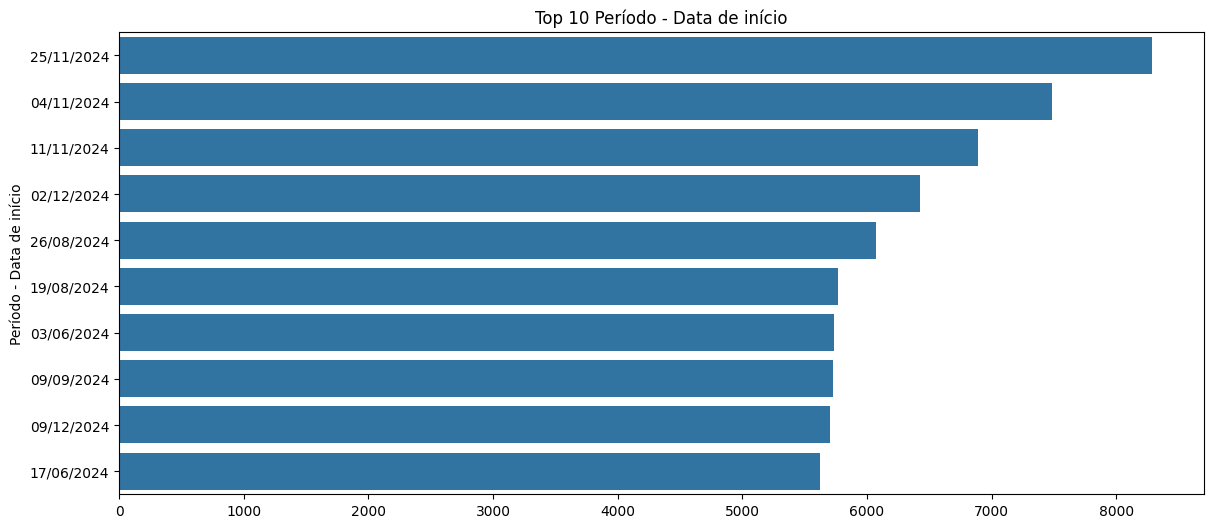

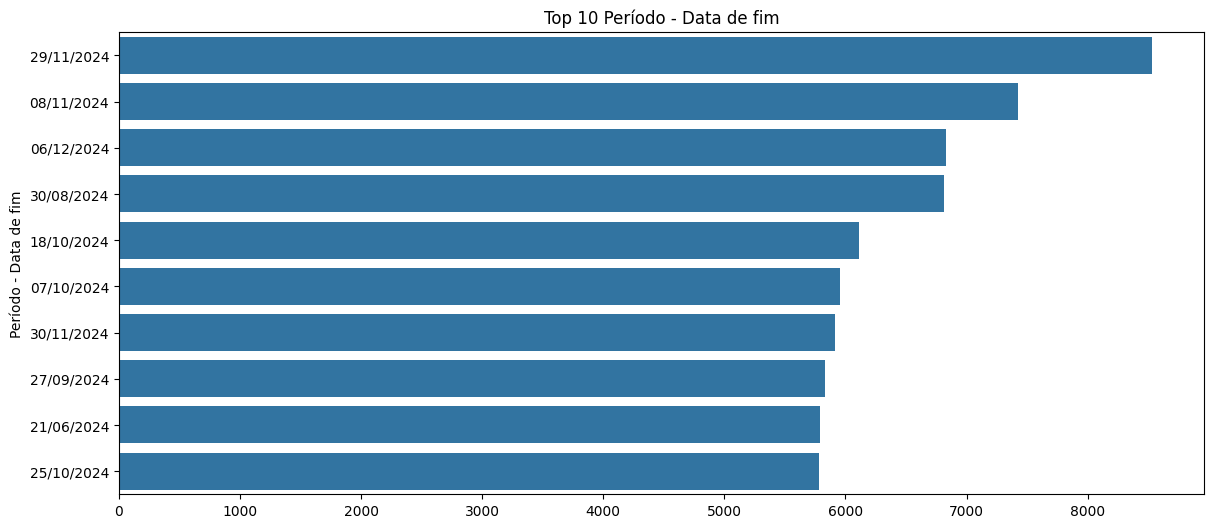

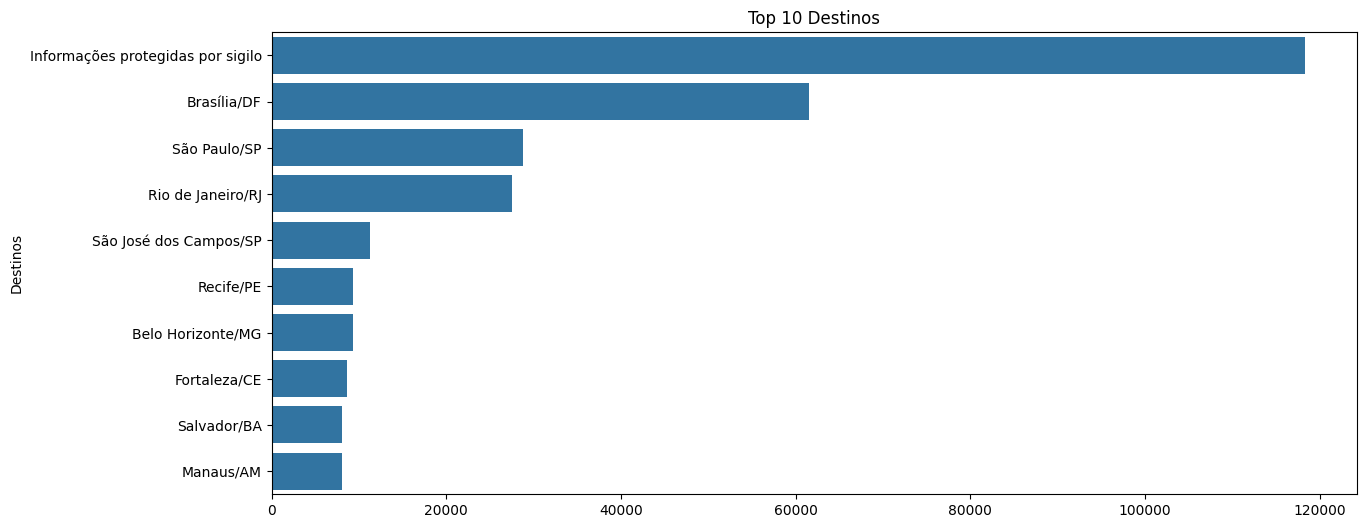

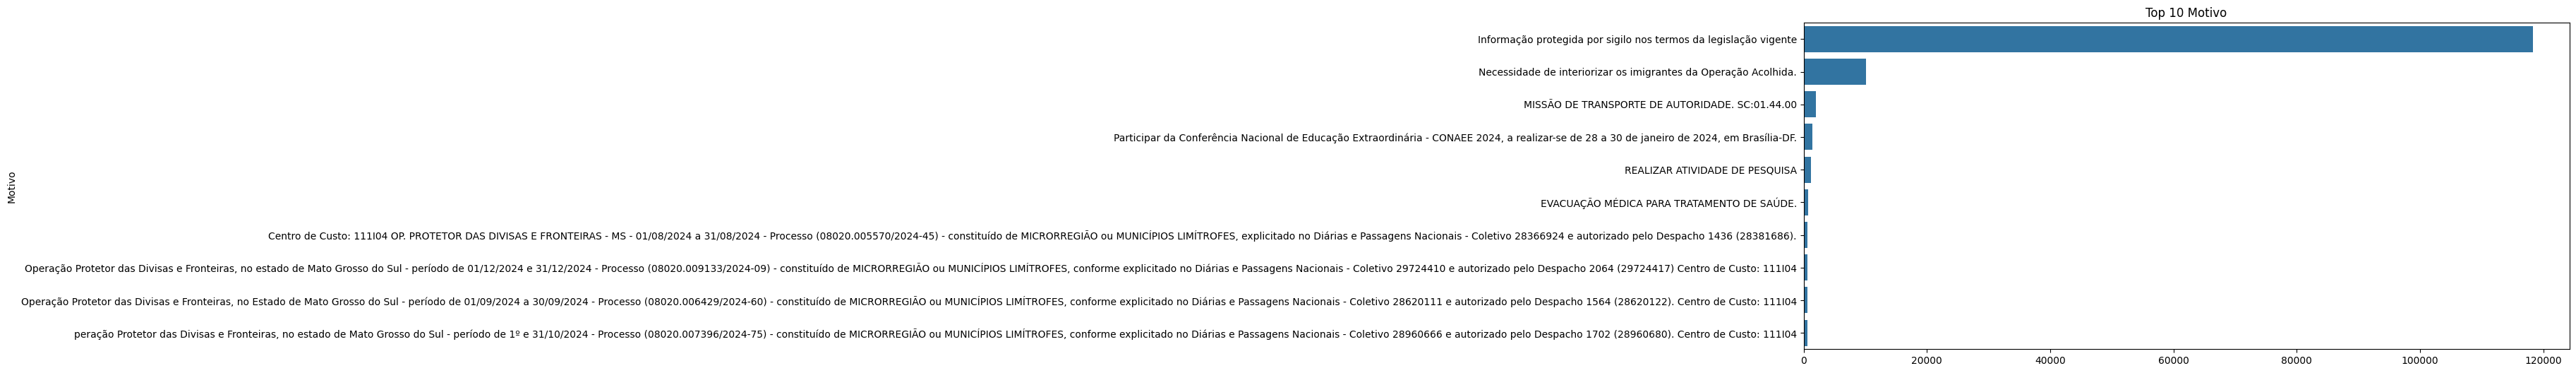

In [47]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=df[col].value_counts().nlargest(10).values, y=df[col].value_counts().nlargest(10).index)
    plt.title(f'Top 10 {col}')
    plt.show()

## Preparação dos Dados

**CARGO**

In [4]:
df2 = df.copy()

# preencher ausentes
df2['Cargo'] = df2['Cargo'].fillna('NÃO IDENTIFICADO')
df2['Cargo'].isna().any()

False

In [5]:
df2['Cargo'].value_counts()

Cargo
NÃO IDENTIFICADO                         306532
Informações protegidas por sigilo        118291
PROFESSOR DO MAGISTERIO SUPERIOR          51960
PROFESSOR ENS BASICO TECN TECNOLOGICO     34883
CONTRATADO LEI 8745/93 - NI               17199
                                          ...  
ANALISTA I - 40HORAS                          1
PROGRAMADOR EDUCACIONAL - NS                  1
DIVULGADOR SANITARIO                          1
MONITOR DE SAUDE                              1
ANALISTA II                                   1
Name: count, Length: 854, dtype: int64

**DATAS**

In [6]:
# convertendo para datas
df2["Período - Data de início"] = pd.to_datetime(df2["Período - Data de início"], format='%d/%m/%Y')
df2["Período - Data de fim"] = pd.to_datetime(df2["Período - Data de fim"], format='%d/%m/%Y')
df2.select_dtypes('datetime64')

,Período - Data de início,Período - Data de fim
0,2024-02-23,2024-02-25
1,2024-01-18,2024-01-22
2,2024-02-29,2024-03-04
3,2024-04-11,2024-04-15
4,2024-01-29,2024-02-06
...,...,...
791515,2024-12-16,2024-12-16
791516,2024-12-17,2024-12-18
791517,2024-12-26,2024-12-27
791518,2024-12-29,2024-12-31


In [9]:
# criar novos atributos com datas
df2['Mês da viagem'] = df2['Período - Data de início'].dt.month
df2['Dias de viagem'] = (df2['Período - Data de fim'] - df2['Período - Data de início']).dt.days
df2[['Mês da viagem','Dias de viagem']]

,Mês da viagem,Dias de viagem
0,2,2
1,1,4
2,2,4
3,4,4
4,1,8
...,...,...
791515,12,0
791516,12,1
791517,12,1
791518,12,2
